In [10]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
pd.set_option("display.max.columns",None)
plt.style.use('seaborn')

In [11]:
diabetes = pd.read_csv('../data/diabetes_data.csv')
stroke = pd.read_csv('../data/stroke_data.csv')
hypertension = pd.read_csv('../data/hypertension_data.csv')

##  Influence de l'alimentation sur la santé 
Croisez "Fruits" et "Veggies" avec "GenHlth", "MentHlth", "PhysHlth", "DiffWalk" pour évaluer l'impact de la consommation de fruits et légumes sur la santé physique et mentale.

- Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes

- Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes

- PhysActivity physical activity in past 30 days - not including job 0 = no 1 = yes 

- GenHlth :  Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

- MentHlth :  days of poor mental health scale 1-30 days

- PhysHlth : physical illness or injury days in past 30 days scale 1-30

- DiffWalk :Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

In [12]:
plt.style.use("seaborn")

         PhysHlth
mean     5.810417
std     10.062261
median   0.000000
min      0.000000
max     30.000000


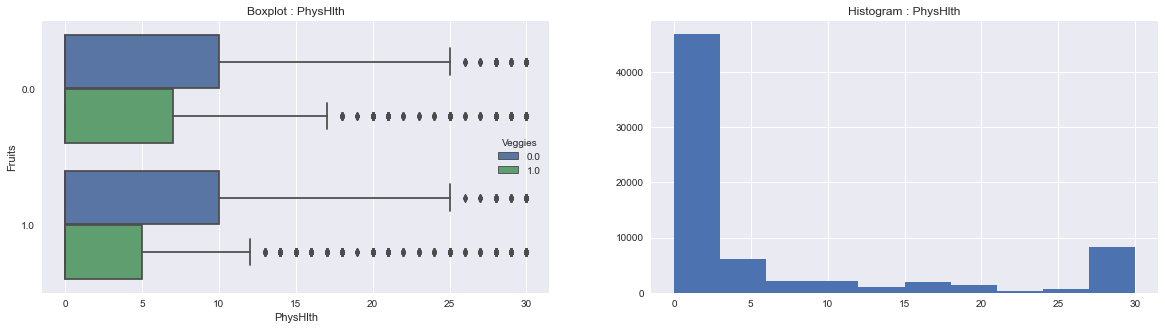

         MentHlth
mean     3.752037
std      8.155627
median   0.000000
min      0.000000
max     30.000000


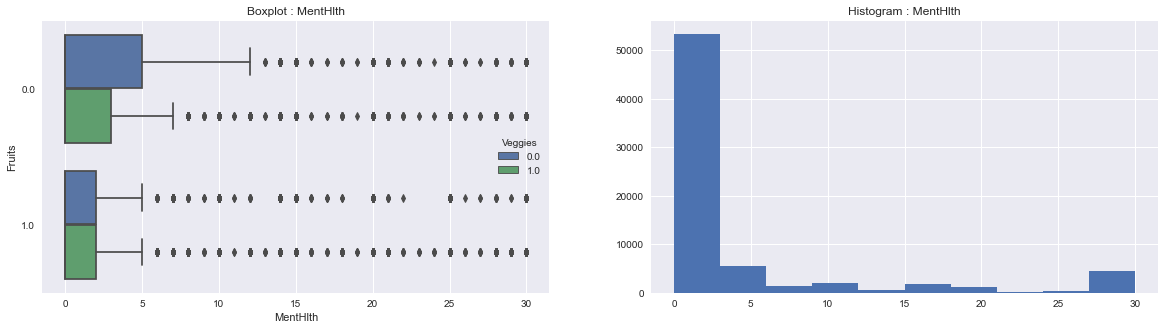

         GenHlth
mean    2.837082
std     1.113565
median  3.000000
min     1.000000
max     5.000000


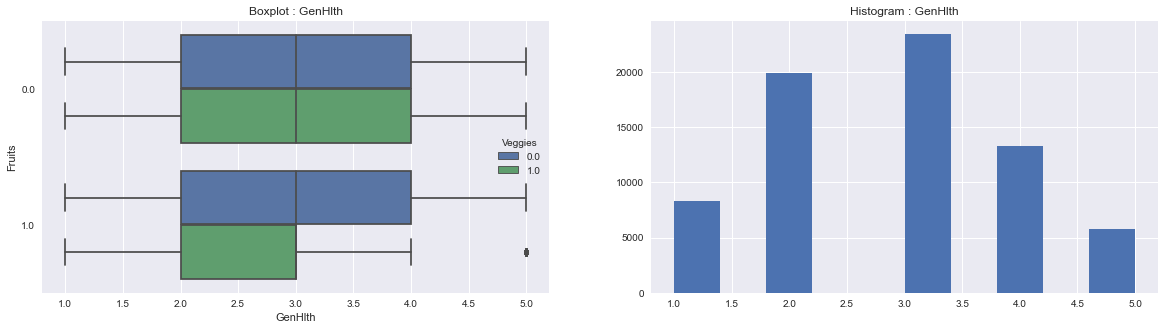

In [13]:
for i in ['PhysHlth','MentHlth',"GenHlth"]:
    print("="*50)
    print(diabetes[i].agg(['mean',"std",'median','min','max']).to_frame())
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f'Boxplot : {i}')
    sns.boxplot(x=diabetes[i], y=diabetes['Fruits'].astype('category'), hue = diabetes['Veggies'].astype('category') )
    plt.subplot(1,2,2)
    plt.title(f'Histogram : {i}')
    plt.hist(diabetes[i])
    
    plt.show()
    print("="*50)

In [14]:
diabetes['DiffWalk'] = diabetes['DiffWalk'].astype("category")

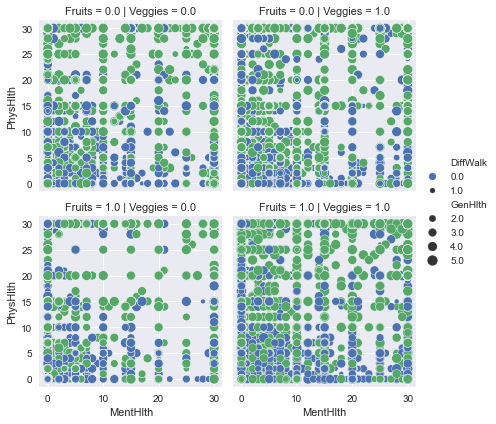

In [15]:
g = sns.FacetGrid(diabetes, col="Veggies", row='Fruits')
g.map(sns.scatterplot,"MentHlth","PhysHlth","DiffWalk","GenHlth")
g.add_legend()

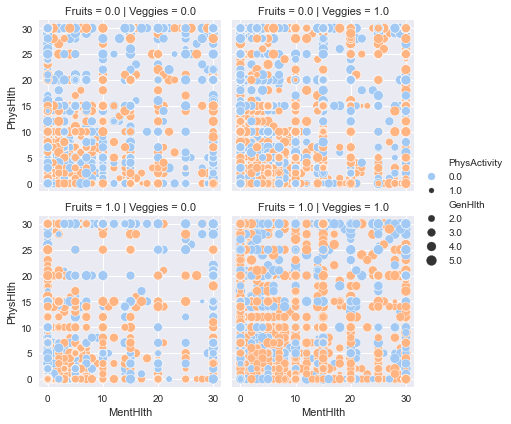

In [16]:
sns.set_palette("pastel")

g = sns.FacetGrid(diabetes, col="Veggies", row='Fruits')
g.map(sns.scatterplot,"MentHlth","PhysHlth","PhysActivity","GenHlth")
g.add_legend()

## Potential Biases

This may be related to a bias in the data, which is that an individual who is sick or in poor health will necessarily pay more attention to their nutrition than a healthy individual in good shape.



## Correlation Matrix

In [17]:
diabetes.groupby(['Veggies','Fruits'])[['GenHlth','MentHlth',"PhysHlth","PhysActivity"]].describe().T

Veggies                     0.0                        1.0              
Fruits                      0.0          1.0           0.0           1.0
GenHlth      count  9152.000000  5780.000000  18291.000000  37469.000000
             mean      3.126748     3.022145      2.899131      2.707492
             std       1.104870     1.098944      1.095867      1.106554
             min       1.000000     1.000000      1.000000      1.000000
             25%       2.000000     2.000000      2.000000      2.000000
             50%       3.000000     3.000000      3.000000      3.000000
             75%       4.000000     4.000000      4.000000      3.000000
             max       5.000000     5.000000      5.000000      5.000000
MentHlth     count  9152.000000  5780.000000  18291.000000  37469.000000
             mean      4.971372     3.953114      4.095894      3.255331
             std       9.356433     8.444748      8.440030      7.593783
             min       0.000000     0.000000      0.000000      0.000000
             25%       0.000000     0.000000      0.000000      0.000000
             50%       0.000000     0.000000      0.000000      0.000000
             75%       5.000000     2.000000      3.000000      2.000000
             max      30.000000    30.000000     30.000000     30.000000
PhysHlth     count  9152.000000  5780.000000  18291.000000  37469.000000
             mean      7.336101     6.755017      5.967580      5.215325
             std      11.097043    10.743684     10.127011      9.592304
             min       0.000000     0.000000      0.000000      0.000000
             25%       0.000000     0.000000      0.000000      0.000000
             50%       0.000000     0.000000      0.000000      0.000000
             75%      10.000000    10.000000      7.000000      5.000000
             max      30.000000    30.000000     30.000000     30.000000
PhysActivity count  9152.000000  5780.000000  18291.000000  37469.000000
             mean      0.537150     0.625087      0.670876      0.771278
             std       0.498645     0.484142      0.469908      0.420016
             min       0.000000     0.000000      0.000000      0.000000
             25%       0.000000     0.000000      0.000000      1.000000
             50%       1.000000     1.000000      1.000000      1.000000
             75%       1.000000     1.000000      1.000000      1.000000
             max       1.000000     1.000000      1.000000      1.000000

In [18]:
diabetes[['Veggies','Fruits','GenHlth','MentHlth',"PhysHlth","PhysActivity"]].corr()['Veggies']*100

Veggies         100.000000
Fruits           23.860529
GenHlth         -11.579532
MentHlth         -5.235907
PhysHlth         -6.689600
PhysActivity     14.932234
Name: Veggies, dtype: float64

## Pearson correlation test

Print the results for non-significant correlations

In [21]:
import scipy


for i in diabetes.columns:
    pearson_corr, p_value = scipy.stats.pearsonr(diabetes[i], diabetes['HeartDiseaseorAttack'])
    
    if p_value > 0.05 : 
        print("="*50)
        print(i)
        print("Pearson correlation coefficient:", pearson_corr)
        print("p-value:", p_value)
        print("="*50)

## Chi2 contingency Test

For each pair of columns, let's creates a contingency table and calculates the chi-squared statistic and p-value. If the p-value is less than 0.05, it concludes that the variables are not independent and prints a message to that effect along with the p-value.

In [22]:
import itertools
from scipy.stats import chi2_contingency

col = ['Veggies','Fruits','GenHlth','MentHlth',"PhysHlth","PhysActivity"]
items = list(itertools.combinations(col, 2))

for item in items: 
    contingency_table = pd.crosstab(diabetes[item[0]], diabetes[item[1]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("="*50)
    if p<0.05: 
        print(f"Independency is rejected for {item}")
        print(f"The p-value is : {p}")
    print("="*50)

Independency is rejected for ('Veggies', 'Fruits')
The p-value is : 0.0
Independency is rejected for ('Veggies', 'GenHlth')
The p-value is : 4.318776052073529e-210
Independency is rejected for ('Veggies', 'MentHlth')
The p-value is : 5.309952355534417e-34
Independency is rejected for ('Veggies', 'PhysHlth')
The p-value is : 1.9988714644227698e-57
Independency is rejected for ('Veggies', 'PhysActivity')
The p-value is : 0.0
Independency is rejected for ('Fruits', 'GenHlth')
The p-value is : 2.3525684772895332e-152
Independency is rejected for ('Fruits', 'MentHlth')
The p-value is : 2.267190252779708e-52
Independency is rejected for ('Fruits', 'PhysHlth')
The p-value is : 9.491131837710893e-32
Independency is rejected for ('Fruits', 'PhysActivity')
The p-value is : 4.1231778641677254e-277
Independency is rejected for ('GenHlth', 'MentHlth')
The p-value is : 0.0
Independency is rejected for ('GenHlth', 'PhysHlth')
The p-value is : 0.0
Independency is rejected for ('GenHlth', 'PhysActivity

## Summary

The chi-squared tests reveal that all the considered health-related variables in the dataset are interdependent. These findings suggest that an individual's diet, general health, mental health, physical health, and physical activity are closely linked. Effective health interventions should take this interdependency into account to promote overall well-being.